# Chicago Crime Revisit

This notebook focuses on analyzing a random subset of the full Chicago Crime dataest. The dimensions of this dataset are described below.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
crime_df = pd.read_csv("C:\\Users\\mbadi\\Desktop\\Summer_Research\\reduced_crime_df.csv")

In [3]:
crime_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 269251 entries, 0 to 269250
Data columns (total 31 columns):
Unnamed: 0                    269251 non-null int64
ID                            269251 non-null float64
Case Number                   269251 non-null object
Date                          269251 non-null object
Block                         269251 non-null object
IUCR                          269251 non-null object
Primary Type                  269251 non-null object
Description                   269251 non-null object
Location Description          269251 non-null object
Arrest                        269251 non-null bool
Domestic                      269251 non-null bool
Beat                          269251 non-null float64
District                      269251 non-null float64
Ward                          269251 non-null float64
Community Area                269251 non-null float64
FBI Code                      269251 non-null object
X Coordinate                  269251 non-

The main obstacle is the large number of categories across the categorical variables; this raises memory errors and stifles our analysis. Let's see if we can't reduce the problem so that we stay within only the most "impactful" categories. Before that, we can drop any columns that are meaningless designators like "ID" and "Case Number". Latitude and Longitude won't help us much either. 

In [4]:
useless_cols = ["Unnamed: 0","ID","Case Number","IUCR","X Coordinate","Y Coordinate","Latitude","Longitude"]

In [5]:
crime_df.drop(useless_cols, axis=1, inplace=True)

Referencing the source URL: https://data.cityofchicago.org/Public-Safety/Crimes-2001-to-present-Dashboard/5cd6-ry5g,

The on-site analysis gives some insights: 

-> Most crimes are not domestic, which the state of Illinois defines as "within the family unit"

-> The top four types of crimes encompass the vast majority: namely theft, battery, criminal damage, and narcotics. 

-> The top four locations of crimes also encompass the vast majority: these are street, residence, apartment, and sidewalk.

We'll restrict our data to the intersection of these specified categories. 

In [6]:
crime_type = ["THEFT","BATTERY","NARCOTICS","CRIMINAL DAMAGE"]
crime_loc = ["STREET","RESIDENCE","SIDEWALK","APARTMENT"]

In [7]:
reduced_df = crime_df.loc[crime_df["Location Description"].isin(crime_loc) &
                          crime_df["Primary Type"].isin(crime_type) & 
                          crime_df["Domestic"].isin([False])].copy()

In [8]:
reduced_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 79247 entries, 2 to 269246
Data columns (total 23 columns):
Date                          79247 non-null object
Block                         79247 non-null object
Primary Type                  79247 non-null object
Description                   79247 non-null object
Location Description          79247 non-null object
Arrest                        79247 non-null bool
Domestic                      79247 non-null bool
Beat                          79247 non-null float64
District                      79247 non-null float64
Ward                          79247 non-null float64
Community Area                79247 non-null float64
FBI Code                      79247 non-null object
Year                          79247 non-null float64
Updated On                    79247 non-null object
Location                      79247 non-null object
Historical Wards 2003-2015    79247 non-null float64
Zip Codes                     79247 non-null float64
Com

Since the "Domestic" column contains only False, we can delete it. In addition, we'll remove many of the columns that are either redundant or not of interest. Then we'll create dummy variables, which turns every category into a separate boolean column. From these dummy variables, we'll derive a correlation matrix and display it as a heat map. 

In [9]:
cols_to_keep = ["Primary Type", "Location Description", "Arrest"]

In [10]:
cols_to_remove = [cols for cols in reduced_df.columns if cols not in cols_to_keep]

In [11]:
smaller_df = reduced_df.drop(cols_to_remove, axis=1, inplace=False).copy()

In [12]:
dummies = pd.get_dummies(smaller_df, sparse=True)

In [13]:
cor = dummies.corr()

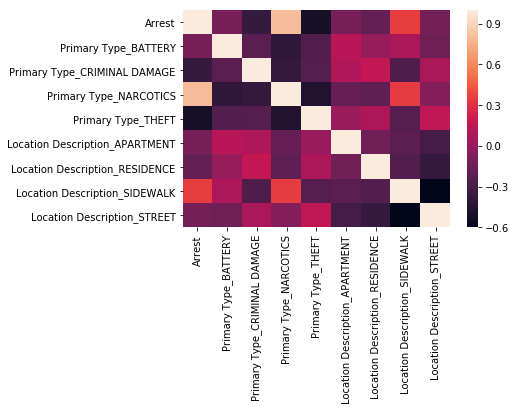

In [14]:
sns.heatmap(cor)

We note some interesting observations. "Arrest" has a significant negative correlation with both "Criminal Damage" and "Theft", but it positively correlates with "Narcotics". In addition, "Arrest" has a slight postive correlation with "Sidewalk". Moreover, there is a positive correlation between "Narcotics" and "Sidewalk".

Some possible takeaways:

-> Crimes involving drugs are likelier to result in arrests

-> Illegal drugs are often sold on the street, hence arrests are likelier to be made on the street

-> Individual drug dealers/traffickers operate recurringly, exposing themselves to arrest more often than other types of criminals 

## Next Steps

We have the beginnings of a better picture of how arrests are related to various types of crime. The key takeaways are that crimes involving narcotics are likelier to result in arrests, and those involving theft or vandalism are not as likely to result in arrests. Most arrests seem to take place on the sidewalk, which isn't surprising. 

Here are some possible next steps:

->Isolate location attributes of crimes, i.e. "ward", "beat",... to see how the rate of arrests varies with location. A problem might be that this trend would not generalize so well- it would be unique to Chicago... 

->I've considered Factor Analysis as an interesting approach, since it could potentially reveal underlying motivators to the apparent variables. This is also a common dimensionality-reduction technique used to tackle largely multi-variate datasets. Note that Factor Analysis is distinct from Principal Component Analysis. For further reading on this topic: https://en.wikipedia.org/wiki/Factor_analysis